In [1]:
# import os
# # os.environ["TF_USE_LEGACY_KERAS"] = "1"
# import os
# # os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices=false'

## Get Data 
Download dataset from - https://github.com/Franck-Dernoncourt/pubmed-rct

In [2]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.


In [3]:
!ls pubmed-rct/

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!cat  pubmed-rct/PubMed_20k_RCT/dev.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


## Data preproccessing

In [6]:
# data_dir = 'pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign/'
# data_dir=r'C:\AI\Deep Learning\NLP_PROJECT\SkimLit\pubmed-rct\PubMed_200k_RCT_numbers_replaced_with_at_sign\\'
data_dir = r'C:\AI\Deep Learning\NLP_PROJECT\pubmed-rct\PubMed_200k_RCT_numbers_replaced_with_at_sign/'


In [7]:
import os

filenames=[data_dir+filenames for filenames in os.listdir(data_dir)]

In [8]:
filenames

['C:\\AI\\Deep Learning\\NLP_PROJECT\\pubmed-rct\\PubMed_200k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'C:\\AI\\Deep Learning\\NLP_PROJECT\\pubmed-rct\\PubMed_200k_RCT_numbers_replaced_with_at_sign/test.txt',
 'C:\\AI\\Deep Learning\\NLP_PROJECT\\pubmed-rct\\PubMed_200k_RCT_numbers_replaced_with_at_sign/train',
 'C:\\AI\\Deep Learning\\NLP_PROJECT\\pubmed-rct\\PubMed_200k_RCT_numbers_replaced_with_at_sign/train.txt',
 'C:\\AI\\Deep Learning\\NLP_PROJECT\\pubmed-rct\\PubMed_200k_RCT_numbers_replaced_with_at_sign/train.zip']

In [9]:
def get_lines(filename):
    
    with open(filename,'r') as f:
        return f.readlines()
        
    

In [10]:
train_lines=get_lines(data_dir+"train.txt")

In [11]:
train_lines[:20]

['###24491034\n',
 'BACKGROUND\tThe emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .\n',
 'BACKGROUND\tThis paper describes the design and evaluation of Positive Outlook , an online program aiming to enhance the self-management skills of gay men living with HIV .\n',
 'METHODS\tThis study is designed as a randomised controlled trial in which men living with HIV in Australia will be assigned to either an intervention group or usual care control group .\n',
 "METHODS\tThe intervention group will participate in the online group program ` Positive Outlook ' .\n",
 'METHODS\tThe program is based on self-efficacy theory and uses a self-management approach to enhance skills , confidence and abilities to manage the psychosocial issues associated with HIV in daily life .\n',
 'METHODS\tParticipants will access the program f

In [12]:
len(train_lines)

2593169

In [13]:
def preprocess_text_with_line_numbers(filename):
    input_lines=get_lines(filename)
    abstract_lines=""
    abstract_samples=[]
    
    for line in input_lines:
        if line.startswith('###'):
            abstract_id=line
            abstract_lines=""
        elif line.isspace():
            abstract_line_split=abstract_lines.splitlines()
            
            for abstract_line_number , abstract_line in enumerate(abstract_line_split):
                line_data = {}
                target_text_split = abstract_line.split('\t')
                line_data["target"]=target_text_split[0]
                line_data["text"]=target_text_split[1].lower()
                line_data["line_number"]=abstract_line_number
                line_data["total_lines"]=len(abstract_line_split)-1
                abstract_samples.append(line_data)
                
        else:
            abstract_lines+=line
            
    return abstract_samples
                

In [14]:
%%time
train_samples=preprocess_text_with_line_numbers(data_dir+'train.txt')
test_samples=preprocess_text_with_line_numbers(data_dir+'test.txt')
val_samples=preprocess_text_with_line_numbers(data_dir+'dev.txt')

len(train_samples),len(test_samples),len(val_samples)


CPU times: total: 844 ms
Wall time: 2.46 s


(2211861, 29493, 28932)

In [15]:
train_samples[:14]

[{'target': 'BACKGROUND',
  'text': 'the emergence of hiv as a chronic condition means that people living with hiv are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .',
  'line_number': 0,
  'total_lines': 10},
 {'target': 'BACKGROUND',
  'text': 'this paper describes the design and evaluation of positive outlook , an online program aiming to enhance the self-management skills of gay men living with hiv .',
  'line_number': 1,
  'total_lines': 10},
 {'target': 'METHODS',
  'text': 'this study is designed as a randomised controlled trial in which men living with hiv in australia will be assigned to either an intervention group or usual care control group .',
  'line_number': 2,
  'total_lines': 10},
 {'target': 'METHODS',
  'text': "the intervention group will participate in the online group program ` positive outlook ' .",
  'line_number': 3,
  'total_lines': 10},
 {'target': 'METHODS',
  '

In [16]:
import pandas as pd

In [17]:
train_df=pd.DataFrame(train_samples)
val_df=pd.DataFrame(val_samples)
test_df=pd.DataFrame(test_samples)


In [18]:
train_df.head(14)

,target,text,line_number,total_lines
0,BACKGROUND,the emergence of hiv as a chronic condition me...,0,10
1,BACKGROUND,this paper describes the design and evaluation...,1,10
2,METHODS,this study is designed as a randomised control...,2,10
3,METHODS,the intervention group will participate in the...,3,10
4,METHODS,the program is based on self-efficacy theory a...,4,10
5,METHODS,participants will access the program for a min...,5,10
6,METHODS,primary outcomes are domain specific self-effi...,6,10
7,METHODS,"secondary outcomes include : depression , anxi...",7,10
8,METHODS,"data collection will take place at baseline , ...",8,10
9,CONCLUSIONS,results of the positive outlook study will pro...,9,10


In [19]:
train_df.target.value_counts()

RESULTS        766271
METHODS        722586
CONCLUSIONS    339714
BACKGROUND     196689
OBJECTIVE      186601
Name: target, dtype: int64

<AxesSubplot: ylabel='Frequency'>

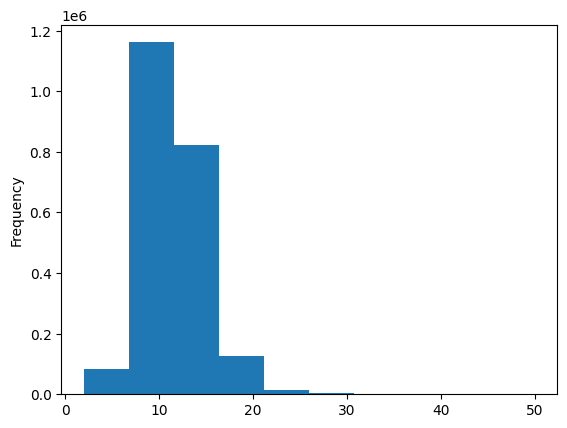

In [20]:
train_df.total_lines.plot.hist()

In [21]:
train_sentences=train_df["text"].tolist()
val_sentences=val_df["text"].tolist()
test_sentences=test_df["text"].tolist()


In [22]:
len(train_sentences),len(val_sentences),len(test_sentences)

(2211861, 28932, 29493)

In [23]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
test_labels_encoded = label_encoder.fit_transform(test_df["target"].to_numpy())
val_labels_encoded = label_encoder.fit_transform(val_df["target"].to_numpy())



In [25]:
train_labels_encoded

array([0, 0, 2, ..., 4, 4, 4])

In [26]:
num_classes=len(label_encoder.classes_)
class_names=label_encoder.classes_

In [27]:
num_classes,class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


model_0=Pipeline([
    ("tf-idf",TfidfVectorizer()),
    ("clf",MultinomialNB()),
])

model_0.fit(X=train_sentences,y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
model_0.score(X=val_sentences,y=val_labels_encoded)

0.7497580533665146

In [30]:
baseline_preds=model_0.predict(val_sentences)
baseline_preds

array([0, 4, 4, ..., 4, 4, 1])

In [31]:

!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [32]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    """
    Calculates model accuracy, precision, recall and f1 score of a binary classification model.

    Args:
        y_true: true labels in the form of a 1D array
        y_pred: predicted labels in the form of a 1D array

    Returns a dictionary of accuracy, precision, recall, f1-score.
    """
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    # Calculate model precision, recall and f1 score using "weighted average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted"
    )
    model_results = {
        "accuracy": model_accuracy,
        "precision": model_precision,
        "recall": model_recall,
        "f1": model_f1,
    }
    return model_results


In [33]:
baseline_results=calculate_results(val_labels_encoded,baseline_preds)

In [34]:
import  numpy as np 
from tensorflow.keras import layers
import tensorflow as tf


In [35]:
sent_len=[len(sentences.split()) for sentences in train_sentences]
avg_sent_len = np.mean(sent_len)
avg_sent_len

26.229355280462922

(array([6.656900e+05, 1.064939e+06, 3.491070e+05, 9.095700e+04,
        2.651300e+04, 8.980000e+03, 3.125000e+03, 1.374000e+03,
        5.800000e+02, 2.770000e+02, 1.350000e+02, 7.100000e+01,
        5.200000e+01, 2.400000e+01, 1.900000e+01, 6.000000e+00,
        4.000000e+00, 5.000000e+00, 1.000000e+00, 2.000000e+00]),
 array([  1.  ,  17.85,  34.7 ,  51.55,  68.4 ,  85.25, 102.1 , 118.95,
        135.8 , 152.65, 169.5 , 186.35, 203.2 , 220.05, 236.9 , 253.75,
        270.6 , 287.45, 304.3 , 321.15, 338.  ]),
 <BarContainer object of 20 artists>)

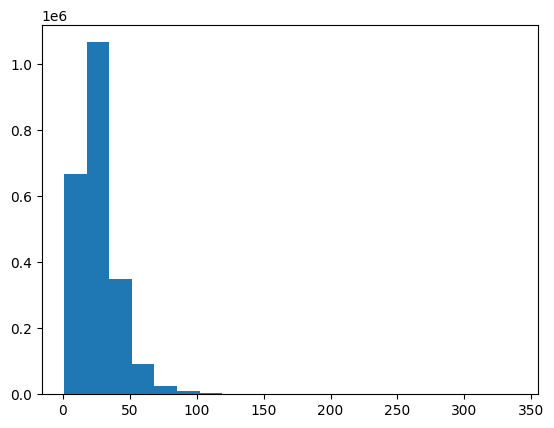

In [36]:
import matplotlib.pyplot as plt 
plt.hist(sent_len,bins=20)

In [37]:
output_seq_length = int(np.percentile(sent_len,95))
output_seq_length

54

In [38]:
max_tokens=68000

In [39]:
from tensorflow.keras.layers import TextVectorization 

text_vectorizer=TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=output_seq_length
)

In [40]:
text_vectorizer.adapt(train_sentences)

In [41]:
import random 

target_sentence = random.choice(train_sentences)
print(f'Sentence :{target_sentence}')
print(f'Lenght {len(target_sentence)}')
print(f'Vector {text_vectorizer([target_sentence])}')

Sentence :with the advent of newer therapies , there is interest in the use of glycolic acid peels and q-switched nd : yag laser ( qsnyl ) in high and low fluence for this disorder .
Lenght 172
Vector [[    7     2 19751     3  7119  1265    51    22  1997     5     2    84
      3 14120   308 15367     4 17211  2603  3491   677 48437     5   186
      4   214 13073    12    24   551     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]]


In [42]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()

In [43]:
print(f'Vocabulary {len(rct_20k_text_vocab)}')
print(f'Most Common words {rct_20k_text_vocab[:5]}')
print(f'Least Common words {rct_20k_text_vocab[-5:]}')


Vocabulary 68000
Most Common words ['', '[UNK]', 'the', 'of', 'and']
Least Common words ['resite', 'residentmonths', 'rescueeligible', 'rescheduling', 'resc']


In [44]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 54,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

In [45]:
token_embed=layers.Embedding(input_dim=len(rct_20k_text_vocab),output_dim=123,mask_zero=True,name="token_embedding")


In [46]:
print(f"Sentence before Vectoriztion {target_sentence}")
vectorized_sentence = text_vectorizer([target_sentence])
print(F"Vectorized sentence (before embedding) {vectorized_sentence}")
embedded_sentence = token_embed(vectorized_sentence)
print(F"Embedded sentence (After embedding) {embedded_sentence}")

print(F"Embedded sentence shape {embedded_sentence.shape}")




Sentence before Vectoriztion with the advent of newer therapies , there is interest in the use of glycolic acid peels and q-switched nd : yag laser ( qsnyl ) in high and low fluence for this disorder .
Vectorized sentence (before embedding) [[    7     2 19751     3  7119  1265    51    22  1997     5     2    84
      3 14120   308 15367     4 17211  2603  3491   677 48437     5   186
      4   214 13073    12    24   551     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]]
Embedded sentence (After embedding) [[[-2.0869900e-02  3.4101892e-02 -1.3485014e-02 ... -3.0705227e-02
   -1.6229749e-03 -1.9952465e-02]
  [-4.4371735e-02  2.7163055e-02  3.8366292e-02 ... -4.7586977e-02
    3.1606410e-02 -3.9887499e-02]
  [-4.3517556e-02 -3.6038637e-02  3.9217185e-02 ...  1.8775463e-05
    1.1385567e-03  2.1936301e-02]
  ...
  [ 4.9674440e-02  4.2129029e-02 -2.6705468e-02 ...  3.2250714e-02
   -3.40406

In [47]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

In [48]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [49]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



In [50]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [51]:
inputs = layers.Input(shape=(1,),dtype=tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x=layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(token_embeddings)
x=layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes,activation='softmax')(x)

model_1=tf.keras.Model(inputs,outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 54)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 54, 123)          8364000   
                                                                 
 conv1d (Conv1D)             (None, 54, 64)            39424     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [52]:
# history_model_1 = model_1.fit(train_dataset,
#                               steps_per_epoch=int(0.1*len(train_dataset)),
#                               epochs=3,
#                               validation_data=valid_dataset,
#                               validation_steps=int(0.1*len(valid_dataset))
#                               )

# train_dataset

In [53]:
# model_1.evaluate(valid_dataset)

In [54]:
# model_1_pred_probs=model_1.predict(valid_dataset)

In [55]:
# model_1_pred_probs.shape

In [56]:
# model_1_preds=tf.argmax(model_1_pred_probs,axis=1)

In [57]:
# model_1_preds

In [58]:
# model_1_results=calculate_results(val_labels_encoded,model_1_preds)

In [59]:
# model_1_results

In [60]:
tf.__version__

'2.10.0'

In [61]:
import tensorflow_hub as hub
# tf_hub_embedding_layer=hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',trainable=False,name='universal_sentence_encoder')

In [62]:
class TFHubEmbeddingLayer(layers.Layer):
    def __init__(self, url, trainable=False, name="universal_sentence_encoder"):
        super(TFHubEmbeddingLayer, self).__init__(trainable=trainable, name=name)
        self.tf_hub_layer = hub.KerasLayer(url)

    def call(self, inputs):
        return self.tf_hub_layer(inputs)

# Create the custom layer and use it in the model
tf_hub_embedding_layer = TFHubEmbeddingLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4"
)


In [63]:

!set XLA_FLAGS=--xla_gpu_cuda_data_dir="C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.6"

In [64]:

inputs=layers.Input(shape=[],dtype=tf.string)
pretrained_embedding=tf_hub_embedding_layer(inputs)
x=layers.Dense(128,activation='relu')(pretrained_embedding)
outputs=layers.Dense(5,activation="softmax")(x)

model_2=tf.keras.Model(inputs=inputs,
                       outputs=outputs,
                       name='model_2_use_feature_extractor')

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [65]:
model_2.summary()

Model: "model_2_use_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (TFHubEmbeddingLayer)                                           
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [66]:
train_labels_one_hot.shape

(2211861, 5)

In [67]:
# history_model_2=model_2.fit(train_dataset,epochs=3,steps_per_epoch=int(0.1*len(train_dataset)),
#                             validation_data=valid_dataset,
#                             validation_steps=int(0.1*len(valid_dataset)))

In [68]:
# model_2_pred_probs=model_2.evaluate(valid_dataset)

In [69]:
# model_2_preds=tf.argmax(model_1_pred_probs,axis=1)

In [70]:
# model_2_results=calculate_results(y_true=val_labels_encoded,y_pred=model_2_preds)

In [71]:
# model_2_results

In [72]:
# baseline_results

In [73]:
train_sentences[:5]

['the emergence of hiv as a chronic condition means that people living with hiv are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .',
 'this paper describes the design and evaluation of positive outlook , an online program aiming to enhance the self-management skills of gay men living with hiv .',
 'this study is designed as a randomised controlled trial in which men living with hiv in australia will be assigned to either an intervention group or usual care control group .',
 "the intervention group will participate in the online group program ` positive outlook ' .",
 'the program is based on self-efficacy theory and uses a self-management approach to enhance skills , confidence and abilities to manage the psychosocial issues associated with hiv in daily life .']

In [74]:
def  split_chars(text):
    return " ".join(list(text))

In [75]:
split_chars(train_sentences[0])

't h e   e m e r g e n c e   o f   h i v   a s   a   c h r o n i c   c o n d i t i o n   m e a n s   t h a t   p e o p l e   l i v i n g   w i t h   h i v   a r e   r e q u i r e d   t o   t a k e   m o r e   r e s p o n s i b i l i t y   f o r   t h e   s e l f - m a n a g e m e n t   o f   t h e i r   c o n d i t i o n   ,   i n c l u d i n g   m a k i n g   p h y s i c a l   ,   e m o t i o n a l   a n d   s o c i a l   a d j u s t m e n t s   .'

In [76]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]


In [77]:
char_lengths=[len(sentence) for sentence in train_sentences]
mean_char_len=np.mean(char_lengths)
mean_char_len

147.82646377869133

(array([2.030236e+06, 1.779350e+05, 3.470000e+03, 1.980000e+02,
        2.000000e+01, 1.000000e+00, 1.000000e+00]),
 array([1.00000000e+00, 2.54428571e+02, 5.07857143e+02, 7.61285714e+02,
        1.01471429e+03, 1.26814286e+03, 1.52157143e+03, 1.77500000e+03]),
 <BarContainer object of 7 artists>)

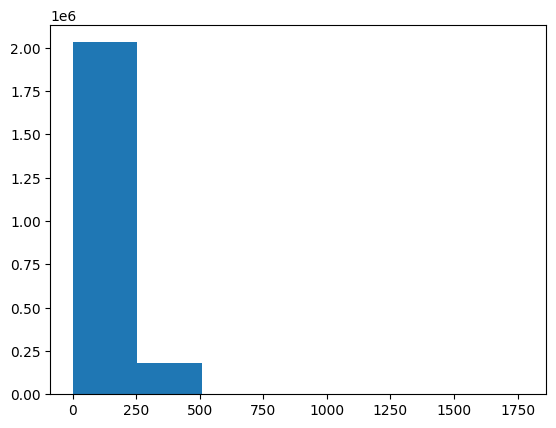

In [78]:
import matplotlib.pyplot as plt 
plt.hist(char_lengths,bins=7)

In [79]:
output_seq_char_len = int(np.percentile(char_lengths,95))
output_seq_char_len

284

In [80]:
import string 
alphabet = string.ascii_lowercase + string.digits + string.punctuation 
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [81]:
NUM_CHAR_TOKENS=len(alphabet) + 2
char_vectorizer=TextVectorization(max_tokens=NUM_CHAR_TOKENS,output_sequence_length=output_seq_char_len,
                                #   standardize=None,
                                  name='char_vectorizer')

In [82]:
char_vectorizer.adapt(train_chars)

In [83]:
char_vocab=char_vectorizer.get_vocabulary()

In [84]:
print(len(char_vocab))
print(f'5 most common characters {char_vocab[:5]}')
print(f'5 least common characters {char_vocab[-5:]}')


28
5 most common characters ['', '[UNK]', 'e', 't', 'a']
5 least common characters ['k', 'x', 'z', 'q', 'j']


In [85]:
random_train_chars = random.choice(train_chars)
print(f'Charified text:\n {random_train_chars}')
print(f'\n Length od random_train_chars : {len(random_train_chars.split())}')
vectorized_chars = char_vectorizer([random_train_chars])
print(f'\n Vectorized chars:\n {vectorized_chars}')
print(f'\n Length of Vectorized chars:\n {len(vectorized_chars[0])}')




Charified text:
 i n   t h e   c u r r e n t   s t u d y   ,   t h e   f i n a l   r e s u l t s   o f   t h i s   s t u d y   w i t h   a   l o n g e r   f o l l o w - u p   a r e   p r e s e n t e d   .

 Length od random_train_chars : 77

 Vectorized chars:
 [[ 5  6  3 13  2 12 16  8  8  2  6  3  9  3 16 10 19  3 13  2 17  5  6  4
  11  8  2  9 16 11  3  9  7 17  3 13  5  9  9  3 16 10 19 20  5  3 13  4
  11  7  6 18  2  8 17  7 11 11  7 20 16 14  4  8  2 14  8  2  9  2  6  3
   2 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [86]:
char_embed=layers.Embedding(input_dim=len(char_vocab),
                            output_dim=25,
                            mask_zero=True,
                            name='char_embed')

In [87]:
print(f'Charified text:\n {random_train_chars}')
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f'Embed chars (after vectoriztion and emmbedding) {char_embed_example}')

Charified text:
 i n   t h e   c u r r e n t   s t u d y   ,   t h e   f i n a l   r e s u l t s   o f   t h i s   s t u d y   w i t h   a   l o n g e r   f o l l o w - u p   a r e   p r e s e n t e d   .
Embed chars (after vectoriztion and emmbedding) [[[ 0.00912967 -0.03644671  0.04148965 ...  0.00228295  0.02432022
   -0.02908078]
  [-0.01276506  0.00252389  0.0385798  ... -0.03386775  0.02279237
    0.03577371]
  [ 0.00743841  0.049599    0.04298785 ... -0.03578198 -0.00731463
    0.03196046]
  ...
  [ 0.03556576  0.00817382  0.01021657 ... -0.02386968 -0.00188874
   -0.02781937]
  [ 0.03556576  0.00817382  0.01021657 ... -0.02386968 -0.00188874
   -0.02781937]
  [ 0.03556576  0.00817382  0.01021657 ... -0.02386968 -0.00188874
   -0.02781937]]]


In [88]:
inputs=layers.Input(shape=(1,),dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings=char_embed(char_vectors)
x=layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(char_embeddings)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(num_classes,activation="softmax")(x)
model_3=tf.keras.Model(inputs=inputs,outputs=outputs,name='model_3_conv1d_char_embeddings')

model_3.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [89]:
model_3.summary()

Model: "model_3_conv1d_char_embeddings"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 284)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 284, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 284, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 

In [90]:
train_char_datasets=tf.data.Dataset.from_tensor_slices((train_chars,train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_datasets=tf.data.Dataset.from_tensor_slices((val_chars,val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_datasets=tf.data.Dataset.from_tensor_slices((test_chars,test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_datasets

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [91]:
# history_3=model_3.fit(train_char_datasets,steps_per_epoch=int(0.1*len(train_char_datasets)),epochs=3,validation_data=val_char_datasets,validation_steps=int(0.1*len(val_char_datasets)))

In [92]:
# model_3_pred_probs=model_3.predict(val_char_datasets)

In [93]:
# model_3_preds=tf.argmax(model_3_pred_probs,axis=1)

In [94]:
# model_3_results=calculate_results(val_labels_encoded,model_3_preds)

In [95]:
# model_3_results

In [96]:
token_inputs = layers.Input(shape=[],dtype=tf.string,name='token_input')
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128,activation='relu')(token_embeddings)
token_model=tf.keras.Model(inputs=token_inputs,
                           outputs=token_outputs)


char_inputs=layers.Input(shape=(1,),dtype=tf.string,name="char_input")
char_vectors=char_vectorizer(char_inputs)
char_embeddings=char_embed(char_vectors)
char_bi_lstm=layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model=tf.keras.Model(
    inputs=char_inputs,
    outputs=char_bi_lstm
)


token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output
                                                                  ])

combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense=layers.Dense(128,activation='relu')(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer=layers.Dense(num_classes,activation='softmax')(final_dropout)


model_4=tf.keras.Model(inputs=[token_model.input,char_model.input],
                       outputs=output_layer,
                       name='model_4_token_and_char_embeddings')


In [97]:
from tensorflow.keras.utils import  plot_model

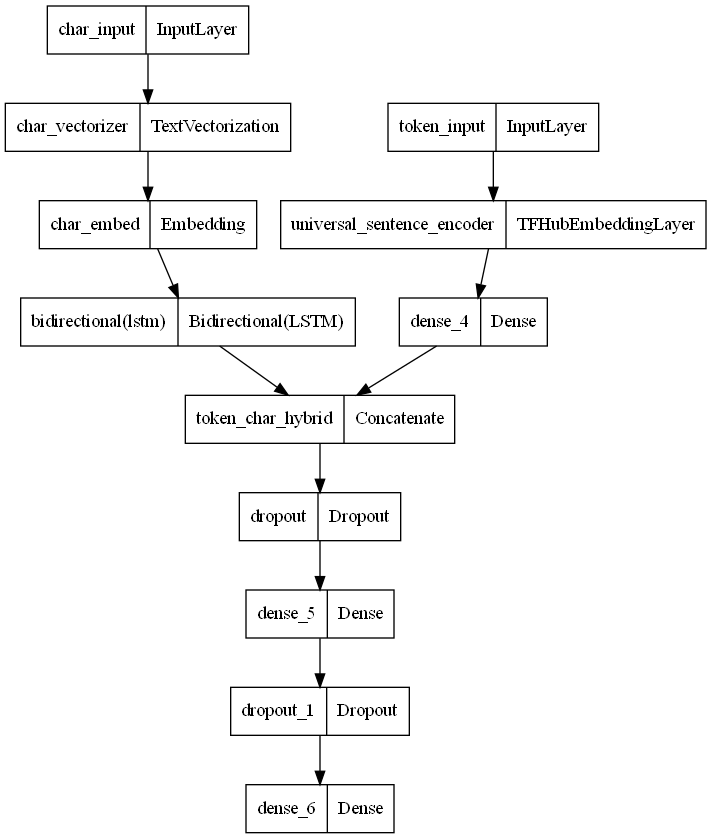

In [98]:
plot_model(model_4)

In [99]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 284)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (TF  (None, 512)         256797824   [

In [100]:
# model_4.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),
#                 metrics=['accuracy'])

In [101]:
train_char_token_data=tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_char_token_labels=tf.data.Dataset.from_tensor_slices((train_labels_one_hot))
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data,train_char_token_labels))


train_char_token_dataset=train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [102]:
val_char_token_data=tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
val_char_token_labels=tf.data.Dataset.from_tensor_slices((val_labels_one_hot))
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data,val_char_token_labels))


val_char_token_dataset=val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [103]:
len(train_char_token_dataset),val_char_token_dataset

(69121,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [104]:
# history_4=model_4.fit(train_char_token_dataset,steps_per_epoch=int(0.1*len(train_char_datasets)),epochs=3,
#                       validation_data=val_char_token_dataset,
#                       validation_steps=int(0.1*len(val_char_token_dataset)))

In [105]:
# model_4.evaluate(val_char_token_dataset)

In [106]:
# model_4_pred_probs = model_4.predict(val_char_token_dataset)

In [107]:
# model_4_preds=tf.argmax(model_4_pred_probs,axis=1)

In [108]:
# model_4_preds

In [109]:
# model_4_results=calculate_results(val_labels_encoded,model_4_preds)

In [110]:
# model_4_results

In [111]:
train_df.head()

,target,text,line_number,total_lines
0,BACKGROUND,the emergence of hiv as a chronic condition me...,0,10
1,BACKGROUND,this paper describes the design and evaluation...,1,10
2,METHODS,this study is designed as a randomised control...,2,10
3,METHODS,the intervention group will participate in the...,3,10
4,METHODS,the program is based on self-efficacy theory a...,4,10


In [112]:
train_df["line_number"].value_counts()  

0     190654
1     190654
2     190654
3     190644
4     190357
5     189080
6     185551
7     177967
8     164187
9     143835
10    117871
11     90168
12     64864
13     44350
14     29186
15     18785
16     11803
17      7392
18      4688
19      3030
20      1925
21      1268
22       814
23       564
24       398
25       288
26       214
27       159
28       118
29        88
30        64
31        55
32        42
33        34
34        21
35        17
36        12
37         9
40         6
38         6
39         6
41         5
42         5
43         5
44         4
45         4
46         3
47         2
48         2
49         2
50         1
Name: line_number, dtype: int64

<AxesSubplot: ylabel='Frequency'>

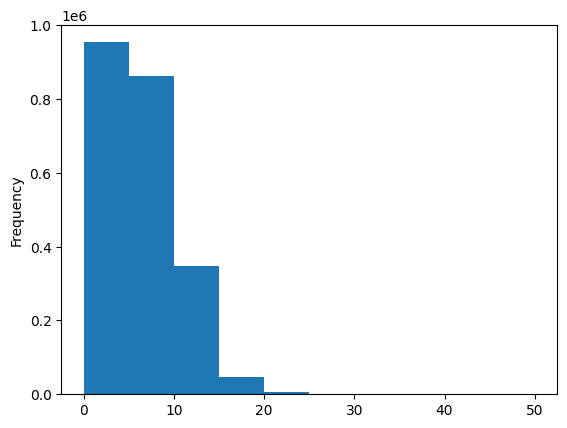

In [113]:
train_df.line_number.plot.hist()

In [114]:
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(),depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(),depth=15)
train_line_numbers_one_hot

<tf.Tensor: shape=(2211861, 15), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [115]:
val_line_numbers_one_hot

<tf.Tensor: shape=(28932, 15), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [116]:
np.percentile(train_df.total_lines,98)

20.0

In [117]:
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(),depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(),depth=20)


In [118]:
train_line_numbers_one_hot[0]

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [119]:
train_total_lines_one_hot[0]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [149]:
token_inputs = layers.Input(shape=[],dtype=tf.string,name='token_input')
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128,activation='relu')(token_embeddings)
token_model=tf.keras.Model(inputs=token_inputs,
                           outputs=token_outputs)


char_inputs=layers.Input(shape=(1,),dtype=tf.string,name="char_input")
char_vectors=char_vectorizer(char_inputs)
char_embeddings=char_embed(char_vectors)
char_bi_lstm=layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model=tf.keras.Model(
    inputs=char_inputs,
    outputs=char_bi_lstm
)
line_number_inputs = layers.Input(shape=(15,),dtype=tf.float32,name="line_number_input")
line_number_outputs= layers.Dense(32,activation='relu')(line_number_inputs)
line_number_model=tf.keras.Model(inputs=line_number_inputs,
                                 outputs=line_number_outputs)

total_lines_inputs = layers.Input(shape=(20,),dtype=tf.float32,name="total_lines_input")
total_lines_outputs= layers.Dense(32,activation='relu')(total_lines_inputs)
total_lines_model=tf.keras.Model(inputs=total_lines_inputs,
                                 outputs=total_lines_outputs)



combined_embeddings = layers.Concatenate(name="char_token_hybrid_embeddings")([token_model.output,
                                                                               char_model.output])
z=layers.Dense(256,activation='relu')(combined_embeddings)
z=layers.Dropout(0.5)(z)



tribrid_embeddings = layers.Concatenate(name='char_token_positional')([line_number_model.output,
                                                                        total_lines_model.output,
                                                                        z])


output_layer=layers.Dense(5,activation='softmax',name="output_layer")(tribrid_embeddings)

model_5=tf.keras.Model(inputs=[line_number_model.input,
                               total_lines_model.input,
                               token_model.input,
                               char_model.input],
                       outputs=output_layer,
                       name="tribrid_embedding_model"
                       )

In [150]:
model_5.summary()

Model: "tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 284)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (TF  (None, 512)         256797824   ['token_inp

In [122]:
from keras.utils import plot_model

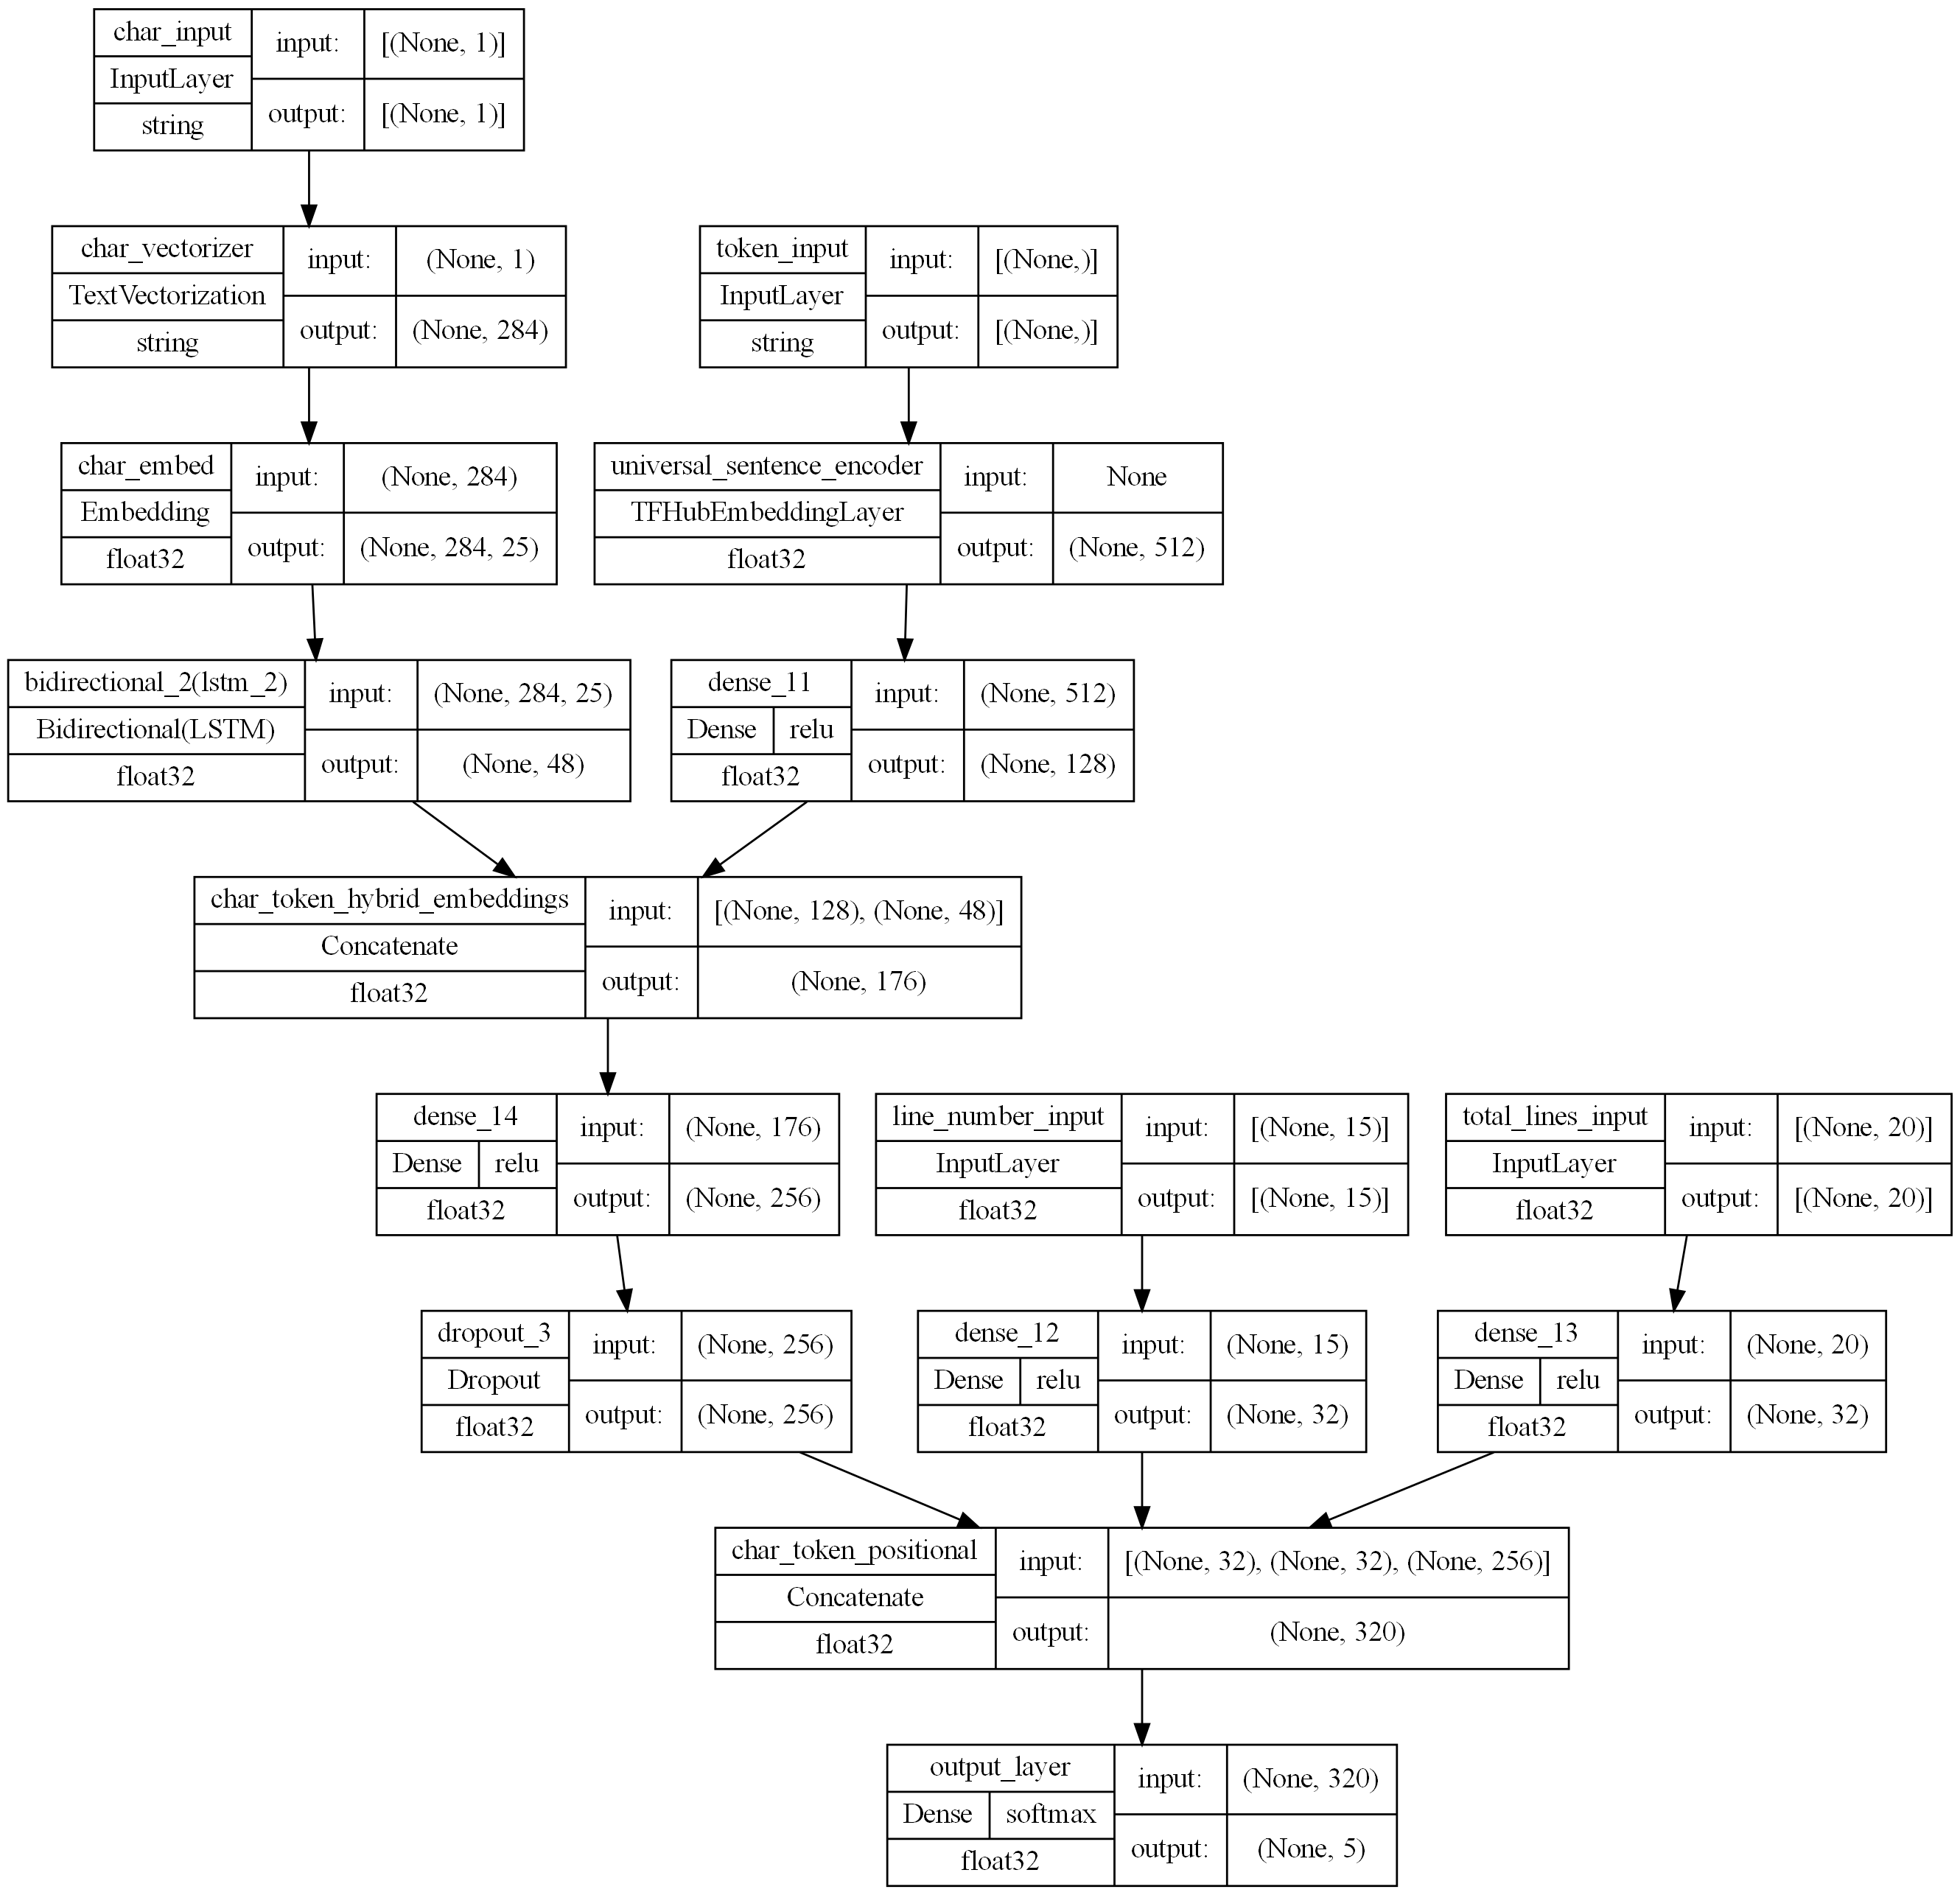

In [135]:
plot_model(model_5,dpi=200,show_shapes=True,show_dtype=True,show_layer_activations=True,show_layer_names=True,expand_nested=True,rankdir="&#x27;TB")

In [151]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [137]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [152]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard

# Define callbacks
checkpoint_cb = ModelCheckpoint("best_model_5_200k", save_best_only=True, monitor="val_loss", mode="min")
early_stopping_cb = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
reduce_lr_cb = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=2, min_lr=1e-6, mode="min", verbose=1)
tensorboard_cb = TensorBoard(log_dir="./logs/model_5", update_freq="epoch")


In [ ]:
history_model_5 = model_5.fit(
    train_pos_char_token_dataset,
    steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
    epochs=10,
    validation_data=val_pos_char_token_dataset,
    validation_steps=int(0.1 * len(val_pos_char_token_dataset)),
    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb, tensorboard_cb]
    )

In [154]:
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset,verbose=1)

905/905 [==============================] - 18s 19ms/step


In [155]:
model_5_preds=tf.argmax(model_5_pred_probs,axis=1)

In [156]:
model_5_preds

<tf.Tensor: shape=(28932,), dtype=int64, numpy=array([0, 2, 4, ..., 1, 1, 1], dtype=int64)>

In [157]:
model_5_results = calculate_results(val_labels_encoded,model_5_preds)

In [158]:
model_5_results

{'accuracy': 87.50518457071755,
 'precision': 0.8755435181378486,
 'recall': 0.8750518457071754,
 'f1': 0.8744257244334988}

In [159]:
model_5.save('skimlit_tribrid_model_200k')

INFO:tensorflow:Assets written to: skimlit_tribrid_model_200k\assets


INFO:tensorflow:Assets written to: skimlit_tribrid_model_200k\assets


In [330]:
# Combine model results into a DataFrame
# all_model_results = pd.DataFrame({"baseline": baseline_results,
#                                   "custom_token_embed_conv1d": model_1_results,
#                                   "pretrained_token_embed": model_2_results,
#                                   "custom_char_embed_conv1d": model_3_results,
#                                   "hybrid_char_token_embed": model_4_results,
#                                   "tribrid_pos_char_token_embed": model_5_results})
# all_model_results = all_model_results.transpose()
# all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
custom_token_embed_conv1d,78.667417,0.783461,0.786674,0.784264
pretrained_token_embed,78.667417,0.783461,0.786674,0.784264
custom_char_embed_conv1d,65.179399,0.642875,0.651794,0.642949
hybrid_char_token_embed,73.209321,0.733328,0.732093,0.730373
tribrid_pos_char_token_embed,83.420495,0.833737,0.834205,0.833115


In [331]:
# all_model_results["accuracy"] = all_model_results["accuracy"]/100

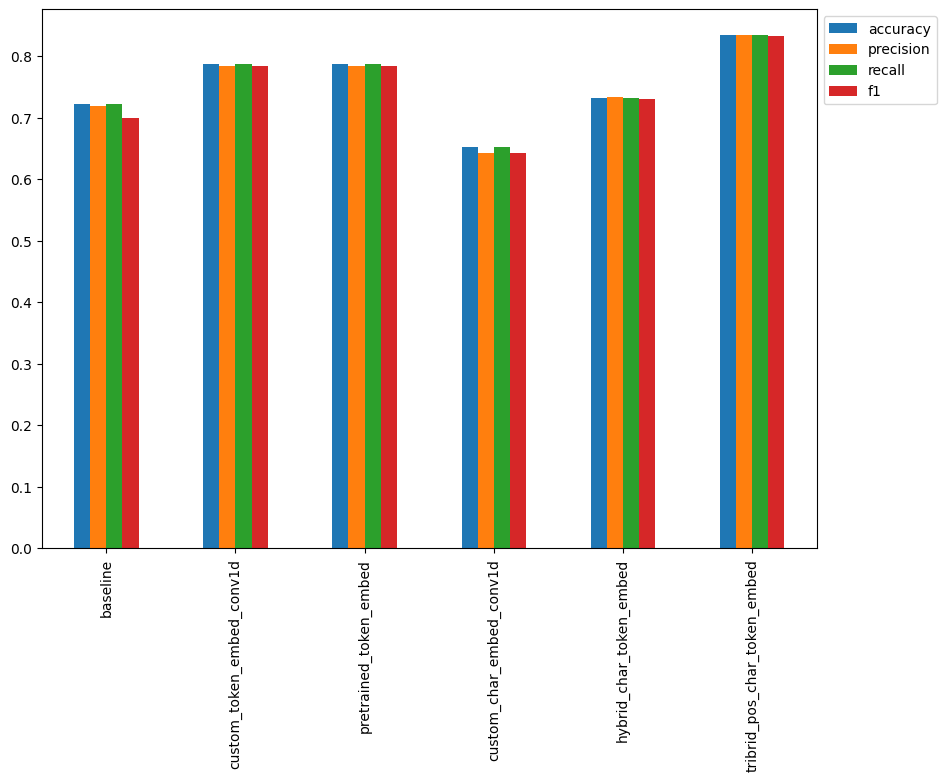

In [332]:
# all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));


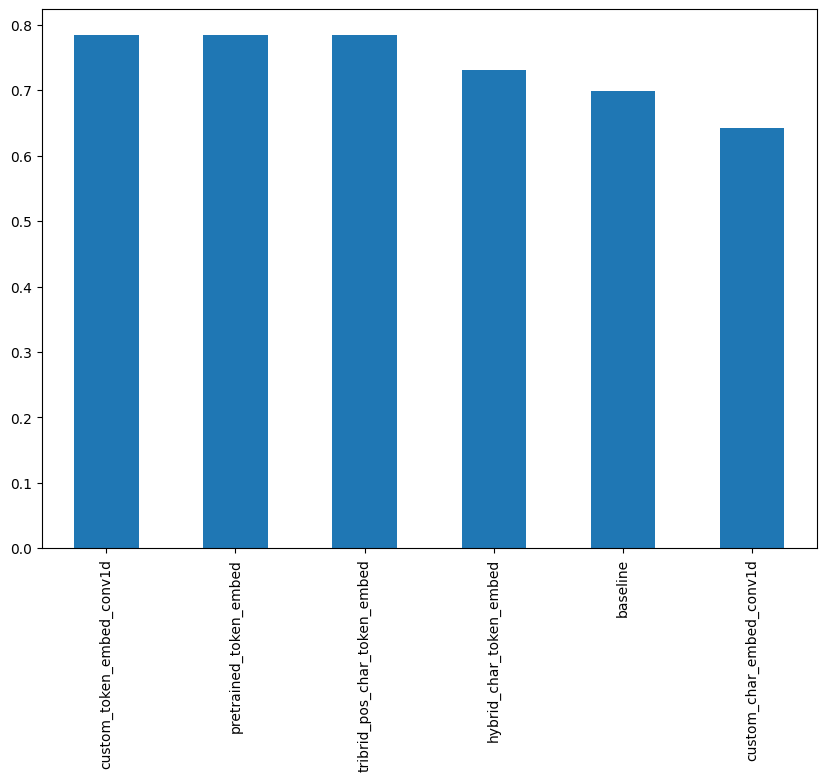

In [320]:
# all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [ ]:
model_5.save("skimlit_tribrid_model_200k") # model will be saved to path specified by string

In [334]:
loaded_model=tf.keras.models.load_model(r'C:\AI\Deep Learning\NLP_PROJECT\SkimLit\skimlit_tribrid_model_20k')

In [335]:
loaded_pred_probs = loaded_model.predict(val_pos_char_token_dataset, verbose=1)
loaded_preds = tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]

945/945 [==============================] - 32s 31ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1], dtype=int64)>

In [336]:
loaded_model_results = calculate_results(val_labels_encoded,
                                         loaded_preds)
loaded_model_results

{'accuracy': 83.42049516748312,
 'precision': 0.8337366913637527,
 'recall': 0.8342049516748312,
 'f1': 0.8331150275809119}

In [337]:
np.isclose(list(model_5_results.values()), list(loaded_model_results.values()), rtol=1e-02)

array([ True,  True,  True,  True])

In [160]:
loaded_model.summary()

NameError: name 'loaded_model' is not defined

In [339]:
test_df

,target,text,line_number,total_lines
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8
1,RESULTS,a post hoc analysis was conducted with the use...,1,8
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8
3,RESULTS,survival analyses were used to assess the asso...,3,8
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8
...,...,...,...,...
30130,RESULTS,there was a statistically significant between-...,13,17
30131,RESULTS,there were no statistically significant betwee...,14,17
30132,RESULTS,there was no significant association between s...,15,17
30133,RESULTS,no adverse effects were reported .,16,17


In [342]:
test_line_numbers_one_hot =tf.one_hot(test_df["line_number"].to_numpy(),depth=15) 
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(),depth=20)

In [343]:
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Check shapes
test_pos_char_token_dataset

<PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [344]:
test_pred_probs = loaded_model.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

942/942 [==============================] - 31s 32ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 0, 2, 2, 4, 4, 4, 1, 4, 0], dtype=int64)>

In [345]:
# Evaluate loaded model test predictions
loaded_model_test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

{'accuracy': 83.04961008793761,
 'precision': 0.8295305915249703,
 'recall': 0.8304961008793761,
 'f1': 0.829262761683119}

In [347]:
%%time
# Get list of class names of test predictions
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

CPU times: total: 2.05 s
Wall time: 13.7 s


['OBJECTIVE',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'RESULTS',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'METHODS',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RE

In [348]:
# Create prediction-enriched test dataframe
test_df["prediction"] = test_pred_classes # create column with test prediction class names
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # get the maximum prediction probability
test_df["correct"] = test_df["prediction"] == test_df["target"] # create binary column for whether the prediction is right or not
test_df.head(20)

,target,text,line_number,total_lines,prediction,pred_prob,correct
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8,OBJECTIVE,0.492647,False
1,RESULTS,a post hoc analysis was conducted with the use...,1,8,BACKGROUND,0.368231,False
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8,METHODS,0.760356,False
3,RESULTS,survival analyses were used to assess the asso...,3,8,METHODS,0.660408,False
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8,RESULTS,0.738787,True
5,RESULTS,when mean hemodynamic profiles were compared i...,5,8,RESULTS,0.920061,True
6,RESULTS,multivariable analyses revealed that patients ...,6,8,RESULTS,0.541514,True
7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,7,8,CONCLUSIONS,0.505699,True
8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8,8,RESULTS,0.528033,False
9,BACKGROUND,minimally invasive endovascular aneurysm repai...,0,12,BACKGROUND,0.587957,True


In [349]:
# Find top 100 most wrong samples (note: 100 is an abitrary number, you could go through all of them if you wanted)
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

,target,text,line_number,total_lines,prediction,pred_prob,correct
13874,CONCLUSIONS,symptom outcomes will be assessed and estimate...,4,6,METHODS,0.950319,False
8545,METHODS,pretest-posttest .,1,11,BACKGROUND,0.947242,False
1827,CONCLUSIONS,nct@ ( clinicaltrials.gov ) .,18,18,BACKGROUND,0.937745,False
16633,CONCLUSIONS,clinicaltrials.gov identifier : nct@ .,19,19,BACKGROUND,0.925553,False
2388,RESULTS,the primary endpoint is the cumulative three-y...,4,13,METHODS,0.925147,False
...,...,...,...,...,...,...,...
5664,METHODS,response rates were high across all follow-ups...,8,15,RESULTS,0.837290,False
3574,RESULTS,the intervention was delivered to children ran...,4,16,METHODS,0.837182,False
8527,OBJECTIVE,participants were randomly allocated to a trea...,2,10,METHODS,0.837141,False
13860,BACKGROUND,to evaluate efficacy and side effects of glyci...,0,9,OBJECTIVE,0.835900,False


In [350]:
# Investigate top wrong preds
for row in top_100_wrong[0:10].itertuples(): # adjust indexes to view different samples
  _, target, text, line_number, total_lines, prediction, pred_prob, _ = row
  print(f"Target: {target}, Pred: {prediction}, Prob: {pred_prob}, Line number: {line_number}, Total lines: {total_lines}\n")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: CONCLUSIONS, Pred: METHODS, Prob: 0.9503185153007507, Line number: 4, Total lines: 6

Text:
symptom outcomes will be assessed and estimates of cost-effectiveness made .

-----

Target: METHODS, Pred: BACKGROUND, Prob: 0.9472419619560242, Line number: 1, Total lines: 11

Text:
pretest-posttest .

-----

Target: CONCLUSIONS, Pred: BACKGROUND, Prob: 0.9377447962760925, Line number: 18, Total lines: 18

Text:
nct@ ( clinicaltrials.gov ) .

-----

Target: CONCLUSIONS, Pred: BACKGROUND, Prob: 0.9255532026290894, Line number: 19, Total lines: 19

Text:
clinicaltrials.gov identifier : nct@ .

-----

Target: RESULTS, Pred: METHODS, Prob: 0.9251473546028137, Line number: 4, Total lines: 13

Text:
the primary endpoint is the cumulative three-year hiv incidence .

-----

Target: CONCLUSIONS, Pred: BACKGROUND, Prob: 0.9241378307342529, Line number: 13, Total lines: 13

Text:
( clinicaltrials.gov : nct@ ) .

-----

Target: CONCLUSIONS, Pred: BACKGROUND, Prob: 0.922253429889679, Line number: 

In [355]:
example_abstracts=[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualized social treatment for high-functioning autism spectrum disorders'},
 {'abstract': "Postpartum depression (PPD) is the most prevalent mood disorder associated with childbirth. No single cause of PPD has been identified, however the increased risk of nutritional deficiencies incurred through the high nutritional requirements of pregnancy may play a role in the pathology of depressive symptoms. Three nutritional interventions have drawn particular interest as possible non-invasive and cost-effective prevention and/or treatment strategies for PPD; omega-3 (n-3) long chain polyunsaturated fatty acids (LCPUFA), vitamin D and overall diet. We searched for meta-analyses of randomised controlled trials (RCT's) of nutritional interventions during the perinatal period with PPD as an outcome, and checked for any trials published subsequently to the meta-analyses. Fish oil: Eleven RCT's of prenatal fish oil supplementation RCT's show null and positive effects on PPD symptoms. Vitamin D: no relevant RCT's were identified, however seven observational studies of maternal vitamin D levels with PPD outcomes showed inconsistent associations. Diet: Two Australian RCT's with dietary advice interventions in pregnancy had a positive and null result on PPD. With the exception of fish oil, few RCT's with nutritional interventions during pregnancy assess PPD. Further research is needed to determine whether nutritional intervention strategies during pregnancy can protect against symptoms of PPD. Given the prevalence of PPD and ease of administering PPD measures, we recommend future prenatal nutritional RCT's include PPD as an outcome.",
  'source': 'https://pubmed.ncbi.nlm.nih.gov/28012571/',
  'details': 'Formatting removed (can be used to compare model to actual example)'},
 {'abstract': 'Mental illness, including depression, anxiety and bipolar disorder, accounts for a significant proportion of global disability and poses a substantial social, economic and heath burden. Treatment is presently dominated by pharmacotherapy, such as antidepressants, and psychotherapy, such as cognitive behavioural therapy; however, such treatments avert less than half of the disease burden, suggesting that additional strategies are needed to prevent and treat mental disorders. There are now consistent mechanistic, observational and interventional data to suggest diet quality may be a modifiable risk factor for mental illness. This review provides an overview of the nutritional psychiatry field. It includes a discussion of the neurobiological mechanisms likely modulated by diet, the use of dietary and nutraceutical interventions in mental disorders, and recommendations for further research. Potential biological pathways related to mental disorders include inflammation, oxidative stress, the gut microbiome, epigenetic modifications and neuroplasticity. Consistent epidemiological evidence, particularly for depression, suggests an association between measures of diet quality and mental health, across multiple populations and age groups; these do not appear to be explained by other demographic, lifestyle factors or reverse causality. Our recently published intervention trial provides preliminary clinical evidence that dietary interventions in clinically diagnosed populations are feasible and can provide significant clinical benefit. Furthermore, nutraceuticals including n-3 fatty acids, folate, S-adenosylmethionine, N-acetyl cysteine and probiotics, among others, are promising avenues for future research. Continued research is now required to investigate the efficacy of intervention studies in large cohorts and within clinically relevant populations, particularly in patients with schizophrenia, bipolar and anxiety disorders.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/28942748/',
  'details': 'Effect of nutrition on mental health'},
 {'abstract': "Hepatitis C virus (HCV) and alcoholic liver disease (ALD), either alone or in combination, count for more than two thirds of all liver diseases in the Western world. There is no safe level of drinking in HCV-infected patients and the most effective goal for these patients is total abstinence. Baclofen, a GABA(B) receptor agonist, represents a promising pharmacotherapy for alcohol dependence (AD). Previously, we performed a randomized clinical trial (RCT), which demonstrated the safety and efficacy of baclofen in patients affected by AD and cirrhosis. The goal of this post-hoc analysis was to explore baclofen's effect in a subgroup of alcohol-dependent HCV-infected cirrhotic patients. Any patient with HCV infection was selected for this analysis. Among the 84 subjects randomized in the main trial, 24 alcohol-dependent cirrhotic patients had a HCV infection; 12 received baclofen 10mg t.i.d. and 12 received placebo for 12-weeks. With respect to the placebo group (3/12, 25.0%), a significantly higher number of patients who achieved and maintained total alcohol abstinence was found in the baclofen group (10/12, 83.3%; p=0.0123). Furthermore, in the baclofen group, compared to placebo, there was a significantly higher increase in albumin values from baseline (p=0.0132) and a trend toward a significant reduction in INR levels from baseline (p=0.0716). In conclusion, baclofen was safe and significantly more effective than placebo in promoting alcohol abstinence, and improving some Liver Function Tests (LFTs) (i.e. albumin, INR) in alcohol-dependent HCV-infected cirrhotic patients. Baclofen may represent a clinically relevant alcohol pharmacotherapy for these patients.",
  'source': 'https://pubmed.ncbi.nlm.nih.gov/22244707/',
  'details': 'Baclofen promotes alcohol abstinence in alcohol dependent cirrhotic patients with hepatitis C virus (HCV) infection'}]

In [356]:
# See what our example abstracts look like
abstracts = pd.DataFrame(example_abstracts)
abstracts

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


In [358]:
from spacy.lang.en import English
nlp = English() 
sentencizer = nlp.add_pipe("sentencizer") 
doc = nlp(example_abstracts[0]["abstract"]) 
abstract_lines = [str(sent) for sent in list(doc.sents)]
abstract_lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

In [360]:
# Get total number of lines
total_lines_in_sample = len(abstract_lines)

# Go through each line in abstract and create a list of dictionaries containing features for each line
sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

[{'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'line_number': 0,
  'total_lines': 7},
 {'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'line_number': 1,
  'total_lines': 7},
 {'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'line_number': 2,
  'total_lines': 7},
 {'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'line_number': 3,
  'total_lines': 7},
 {'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'line_number': 4,
  'total_lines': 7},
 {'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'line_number': 5,
  'total_lines': 7},
 {'text'

In [361]:
# Get all line_number values from sample abstract
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15) 
test_abstract_line_numbers_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [362]:
# Get all total_lines values from sample abstract
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [363]:
# Split abstract lines into characters
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars

['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [371]:

test_abstract_pred_probs = loaded_model.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

1/1 [==============================] - 0s 39ms/step


array([[0.31016728, 0.12790765, 0.01728619, 0.5156524 , 0.02898647],
       [0.07634047, 0.02846047, 0.725047  , 0.09560059, 0.07455152],
       [0.15364295, 0.04808008, 0.54164535, 0.17647916, 0.08015251],
       [0.10151117, 0.1375047 , 0.5649741 , 0.07200452, 0.12400555],
       [0.04962384, 0.08830645, 0.3862421 , 0.04829058, 0.42753702],
       [0.04206892, 0.1215145 , 0.53833157, 0.0461605 , 0.25192446],
       [0.03112043, 0.14571764, 0.05542102, 0.02176711, 0.74597377],
       [0.02026779, 0.09271028, 0.17991588, 0.03458934, 0.67251676]],
      dtype=float32)

In [372]:
# Turn prediction probabilities into prediction classes
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([3, 2, 2, 2, 4, 2, 4, 4], dtype=int64)>

In [373]:
# Turn prediction class integers into string class names
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS']

In [374]:
# Visualize abstract lines and predicted sequence labels
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
RESULTS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.


## ON 200K DATASET

In [381]:
%%time
train_samples=preprocess_text_with_line_numbers(data_dir+'train.txt')
test_samples=preprocess_text_with_line_numbers(data_dir+'test.txt')
val_samples=preprocess_text_with_line_numbers(data_dir+'dev.txt')

len(train_samples),len(test_samples),len(val_samples)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\AI\\Deep Learning\\NLP_PROJECT\\SkimLit\\pubmed-rct\\PubMed_200k_RCT_numbers_replaced_with_at_sign\\\\train.txt'